In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn 


In [2]:
PATH = "heart_attack_prediction_dataset.csv"
data = pd.read_csv(PATH)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
(data['Heart Attack Risk'] == 1).sum().item(), (data['Heart Attack Risk'] == 0).sum().item()

(3139, 5624)

In [5]:
data['Triglycerides']

0       286
1       235
2       587
3       378
4       231
       ... 
8758     67
8759    617
8760    527
8761    114
8762    180
Name: Triglycerides, Length: 8763, dtype: int64

In [6]:
data['Heart Attack Risk'].iloc[8759], data['Heart Attack Risk'].iloc[8762]

(0, 1)

In [7]:
# Removing unnecessary Fields
data = data.drop('Country', axis=1)
data = data.drop('Continent', axis=1)
data = data.drop('Hemisphere', axis=1)
data = data.drop('Patient ID', axis=1)

In [8]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [10]:
data['Diet']
# Unhealthy = -1
# Average  = 0
# Healthy = 1
data['Diet'] = data['Diet'].where(data['Diet'] != 'Unhealthy', -1)
data['Diet'] = data['Diet'].where(data['Diet'] != 'Average', 0)
data['Diet'] = data['Diet'].where(data['Diet'] != 'Healthy', 1)

# Conver the String into numeric value
data['Diet'] = pd.to_numeric(data['Diet'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   int64  
 12  Previous Heart Probl

In [12]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [13]:
data['Sex']
# Male  = 1
# Female = 0
data['Sex'] = data['Sex'].where(data['Sex'] != 'Male', 1)
data['Sex'] = data['Sex'].where(data['Sex'] != 'Female', 0)

# Conver the String into numeric value
data['Sex'] = pd.to_numeric(data['Sex'])

In [14]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   int64  
 12  Previous Heart Probl

In [16]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

# Conver the String into numeric value
data = data.drop('Blood Pressure', axis = 1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [18]:
# This will be Training and Testing split
int(8763 * 0.8), int(8763 * 0.2)

(7010, 1752)

In [19]:
Y = data['Heart Attack Risk']
data = data.drop('Heart Attack Risk', axis = 1)
X = data

In [20]:
X_tensor, Y_tensor = torch.tensor(np.array(X)).type(torch.float), torch.tensor(np.array(Y)).type(torch.float)

In [21]:
X_tensor.shape, Y_tensor.shape

(torch.Size([8763, 22]), torch.Size([8763]))

In [22]:
len(X_tensor), len(Y_tensor)

(8763, 8763)

In [23]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size = 0.2)

# Creating Model (Using Pre-Trained Model)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [25]:
Y_pred = clf.predict(X_test)

In [26]:
Y_test

tensor([0., 1., 0.,  ..., 0., 0., 1.])

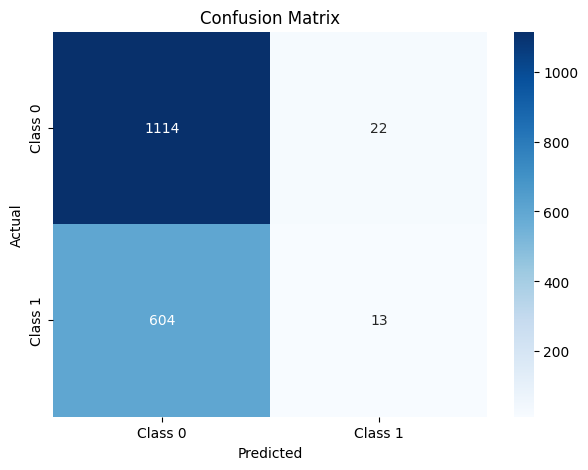

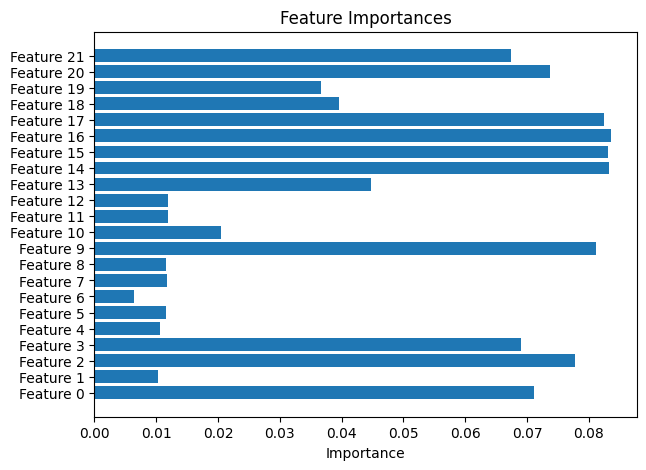

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix Visualization
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Feature Importances Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(7, 5))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), [f'Feature {i}' for i in range(X_train.shape[1])])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

# 3. 2D Classification Boundaries (only if X_train has 2 features)
if X_train.shape[1] == 2:
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    # Create a mesh grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class labels for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the classification boundary
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap='coolwarm', marker='o')
    plt.title("2D Classification Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [28]:
len(Y_test), (Y_pred == Y_test).sum().item()

(1753, 1127)

In [29]:
acc = int(((Y_pred == Y_test).sum().item() / len(Y_test)) * 100)
print(f"Accuracy = {acc} %") # In '%'

Accuracy = 64 %


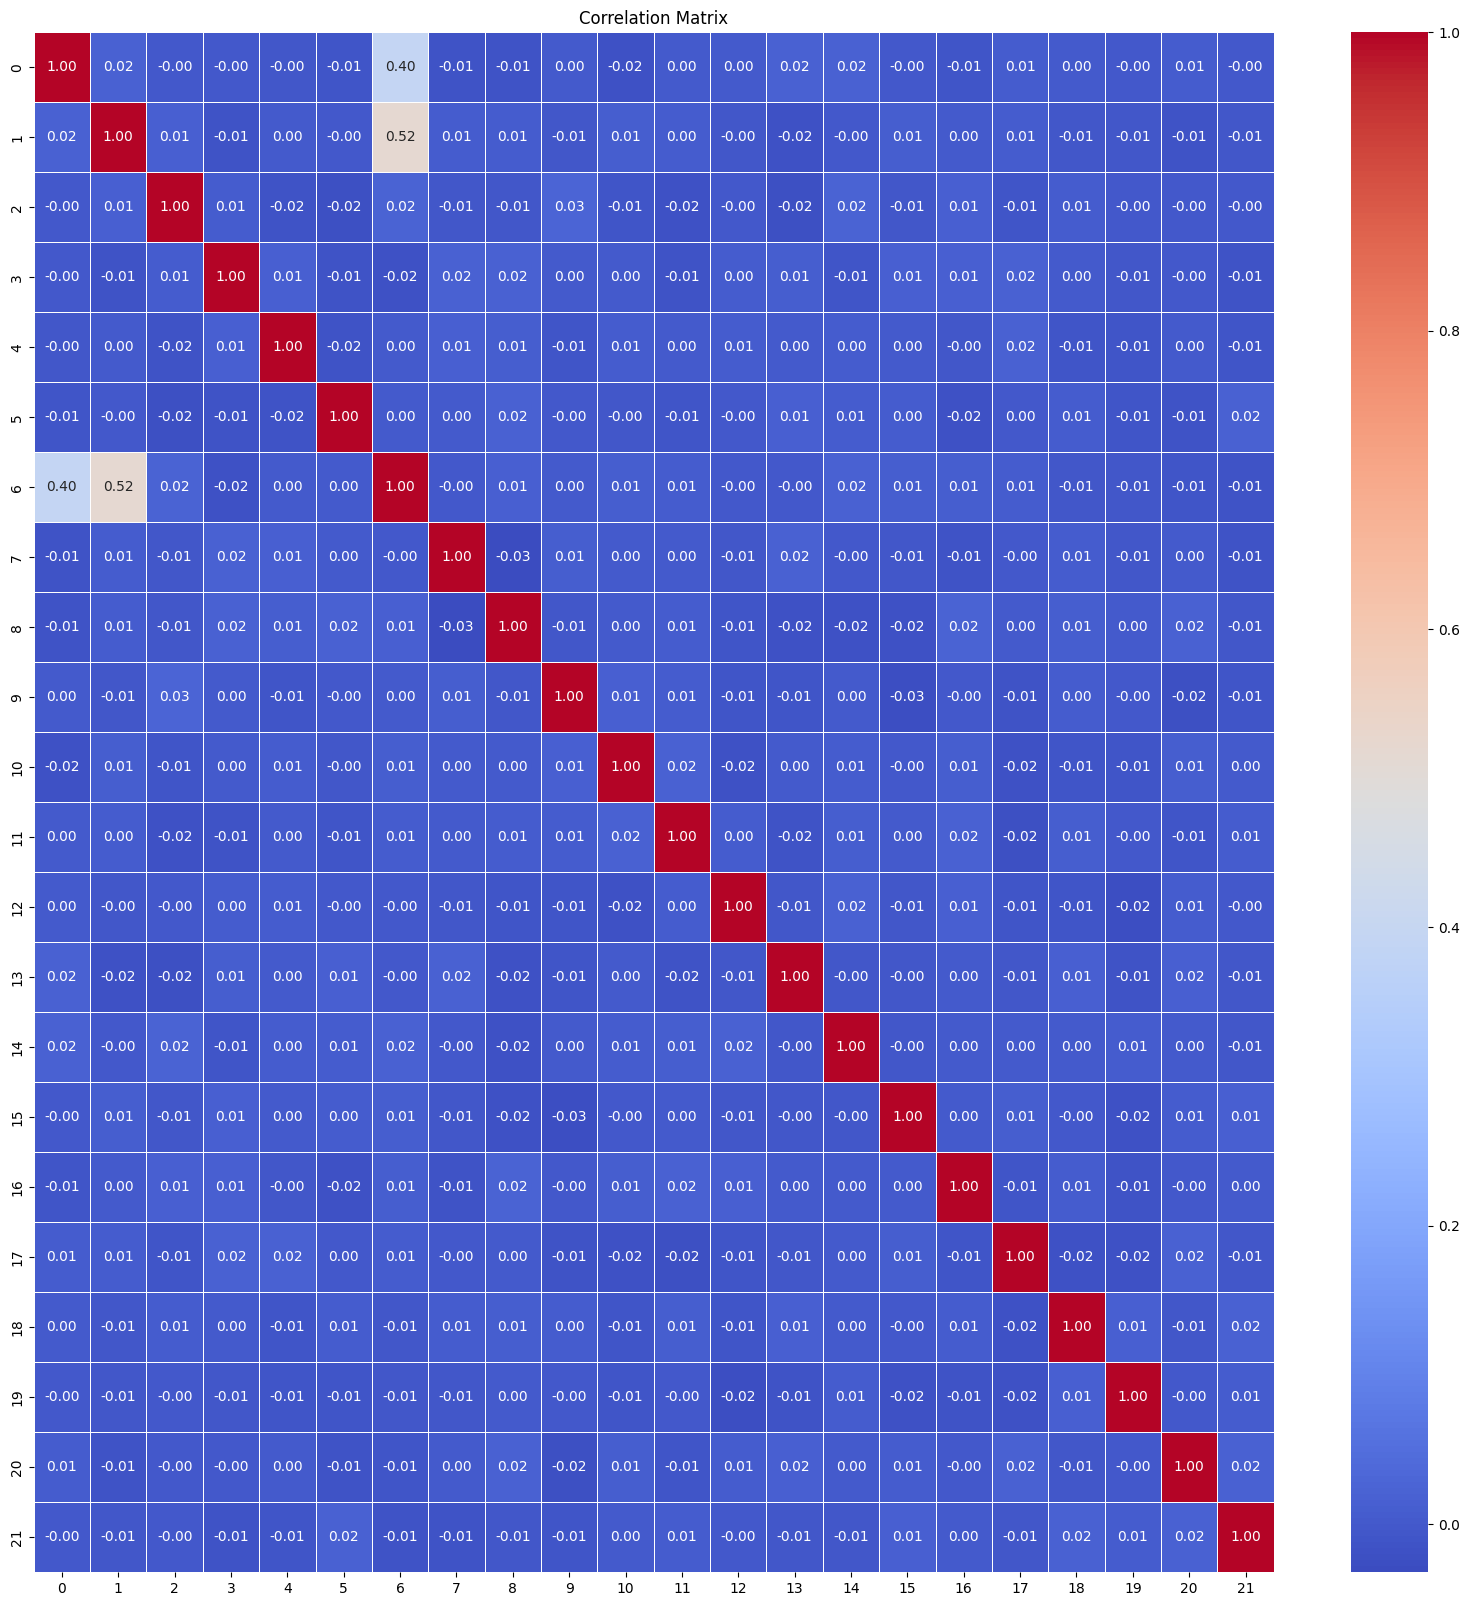

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(X_train.cpu().numpy())

correlation_matrix = df.corr()

plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix") 
plt.show()
